In [1]:
import json
import pandas as pd
import os
import numpy as np
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import string
from nltk.stem.snowball import SnowballStemmer
from surprise import Reader, Dataset, SVD, evaluate
from sklearn.metrics import confusion_matrix
import random
pd.set_option('display.max_columns', 500)
from sklearn.metrics import pairwise_distances


In [2]:
os.chdir("/home/zhejing/4990/dataset")

In [3]:
df=pd.read_csv('df_final.csv')
category=pd.read_csv('df_feature.csv')


In [4]:
df.head()

,business_id,name,avg_stars,review_id,stars,text,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4,KEAHrqN-1DV0gmuNHM6Eww,5,As part of a birthday celebration weekend for ...,xP1IYu2eGfxMWV9tjrurIw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,gmPP4YFrgYsYQqPYokMgFA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,4,Jjz9W-wBkoBoMcB8ZQs5zQ,5,We had early reservations for a party of 9 for...,9bxdPvAhP6cuipD5s2UnCg


In [5]:
df_ratings= df[['business_id','user_id','stars']]

In [6]:
df_ratings.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,xP1IYu2eGfxMWV9tjrurIw,5
1,--9e1ONYQuAa-CB_Rrw7Tw,oFyOUOeGTRZhFPF9uTqrTQ,5
2,--9e1ONYQuAa-CB_Rrw7Tw,2aeNFntqY2QDZLADNo8iQQ,4
3,--9e1ONYQuAa-CB_Rrw7Tw,gmPP4YFrgYsYQqPYokMgFA,5
4,--9e1ONYQuAa-CB_Rrw7Tw,9bxdPvAhP6cuipD5s2UnCg,5


In [44]:
df_ratings = df[['user_id', 'business_id', 'stars']] 
re=pd.Series.value_counts(df_ratings['user_id']).index[pd.Series.value_counts(df_ratings['user_id'])>10]
df1=df[df['user_id'].isin(re.values)]
b_re=pd.Series.value_counts(df_ratings['business_id']).index[pd.Series.value_counts(df_ratings['business_id'])>20]
df2=df1[df1['business_id'].isin(b_re)]
df_ratings = df2[['user_id', 'business_id', 'stars']] 
df=df2

In [40]:
R_df = df_ratings.pivot(index = 'user_id', columns ='business_id', values = 'stars').fillna(0)

In [46]:
X=R_df.copy()

In [47]:
R_df['user_id']= R_df.index
df1=R_df

In [49]:
X.shape

(10607, 2637)

In [50]:
df1.shape

(10607, 2638)

In [51]:
X.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1vfRrlnNnNJ5boOVghMPA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-BS4aZAQm9u41YnB9MUASA,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-C8sSrFqaCxp51pyo-fQLQ,-CbDQXiuKzPQ0_jiUz03aw,-FNquqGseSCVMWo7KbK-Tg,-FcZY7a7qgxTUlTvwuyJnQ,-IWsoxH7mLJTTpU5MmWY4w,-JFVxwdVQfX207554dx1nw,-JfncbVURtvuzBbof40o1w,-K82LBrI3H0FVuhTbNDpRA,-Le6cwbZL4tDZwNHwipfKg,-LzUYsR54hd8cCiYXTquRA,-OEIW0dO96-492qa_luxaw,-P8dGzSVhJi-5oZ-8U2y0w,-PGsEXB6DFTVKa1eDOlzWA,-QNQ4R1VgRoL4b6lC8Anrg,-Qkx7W0itbAApcG5lJuMFQ,-RJ216TTIghZshCkUlD1WQ,-U7tvCtaraTQ9b0zBhpBMA,-WLrZPzjKfrftLWaCi1QZQ,-YWr1wm_NaAlgEf9TZzsMQ,-Ylpy3VyRWwubf9dysuwjQ,-_TSaVr53qiEGqMkwyEMaQ,-_yEVC3_3M6YOsamYfNFEw,-a857YYdjzgOdOjFFRsRXQ,-ed0Yc9on37RoIoG2ZgxBA,-iFvYhgysvjkxckCr42NRw,-ilCufjKjeswCLyIrCtuqQ,-mN7z9oY01Mh_-dwTyzpqg,-oUM2uISux96lMGeawHIOA,-sN_og_84rLW22CaE3cjVw,-wCtRhzWJ40Z4F8mmg7kWg,-wDNRL4lm1UgeFLG9KcrjQ,-xbQQR_ydEJGqYzHSF4DnQ,01Ov9eDxKRY5k6ImMdiWLQ,01SiPgdiOskMC5bUJoyy_g,01VPJkcU0m8WzlA7dCEpVQ,02pL_Xj3sTO_lHcWqUcwKA,03icrim6SfEQJlejDMbzsA,065c76tt1dXBNmoGBymUgQ,06MlxbtB4ZYeg_ri02RIAQ,07AZL5XenCQ_-op_onKLdw,07gh-AImcEcWQ2bew-jprg,07jQarxKd_8J_AJHD5YBqQ,0AQnRQw34IQW9-1gJkYnMA,0CB7YB1qRSWLQvMbHw3Fmw,0EgYXYjt2XJL4hlsKnzrcw,0FHfkDxKSeDuyAEeaY6X-Q,0G1y7uV7w1D2uziS4Lt_Dw,0Hcks5q-DgJbDlmEWolx4A,0InA3Ffj8MxyQV9hgsyYcQ,0LGnU7V3nepi8NUNzyQOXw,0NmTwqYEQiKErDv4a55obg,0OdZXIKQypu6vplpxFilsA,0QHMAUi6NdOUZ1ckXq0-sA,0QSnurP5Ibor2zepJmEIlw,0S4WFZJZhVeM3aAqKjLz1w,0VjHFdczi6Nln_nn8bucJQ,0WPXDs4ini3D7jpiy1Daqw,0WoQQlMXVIDEgI0xNdENKA,0XEqyl_lVaJNHRKxNcjJZg,0YG_kM5caZhtwd6nbnei6A,0_VT3sTwi7gorIlU36ASmg,0_aeYE2-VbsZts_UpILgDw,0_mJttUgHIzC-NO18gcgBA,0ahghcpWQVkm4lEFwx-peA,0aw3HbxkZ4G7pkPYt10fhA,0bWLkWeIcT-EnrE7SiGEBA,0c6PQILCLwRZ8FIB4AEsGw,0d0i0FaJq1GIeW1rS2D-5w,0dr1FgqQSEMbaTu9SDqiIg,0eJG77JOkyMIBhc4Xbuqfw,0eZHVYDyACtVVOIgoBlV3g,0gTTGuA6uEmMhLhfJi0hqA,0gWg-kqRLEQbhui8b_v2Xw,0i9S0BejjRv0ZDwdO9XymA,0jtRI7hVMpQHpUVtUy4ITw,0keht9nVTliinChbGWWkkg,0nlocywsFHQmEt8_xbHNiw,0p27EjcNwTI7Ey4K_MNPww,0qPNeqLuKE88rKbIbSZDpg,0q_BHpxbikVtPRRLRu-U0g,0qet57CmMA5qUm6gPFUTpg,0uR48n5SYcLE_DLcjONZPg,0ueq5zB3NqLbh93KYYNIHQ,0w3BdEOxvwKTpypwbN5kiQ,0wW9PasC8pw8SY7rlY3ZKw,0xdpv5CPpbUUch7JKBG98Q,0xtBEP5zCu1153SoqqemLw,0xvdC8F0HmFpAFkJk6nXLg,0xzmIBsJQc5eUNLucFrZ0Q,0yjLZZx708uJbierAonqQg,0zoXYHq82haayMaV952jEQ,16Fplxu-OwVmTEFxQAUP4g,16tWXenJ1wTqugXJU7yiZg,19S0gFtg5GTX6CkiApJiAQ,19umlhmVB9O3njIBfRAe8g,1CP8aJa8ILlfM5deroar0Q,1CR2ddUcjYYwRd5JLtiRrw,1CTapYK3FHvpiJaQhOaaIw,1CWMNSTRMejdSyXBG2chNg,1DP5vHxJzCDbgawv0WC3yA,1Df5WnLX3DqN6ymlhqznaQ,1FAvxOUOGGyZoYNlAXACag,1JgaRBX0oiRsvEhHF3ZMjw,1KhBzrqmU164bss64jR5uA,1M1A-s6BbnzK3eURw01rZQ,1ME-zOtZ9HApzJUOpR0-vQ,1MrSwj8i2VEBHdp3IsWCpQ,1SCETxRnwaYo2aBC3fi4SA,1SE9f6TEV5XhnTuuK01xwA,1SqLPgnZEVeVYDM-AuoFhg,1Tak6Q-IlkDrdmLwrEZeSg,1UdRVfBlE3unETOu7BDCvw,1UvrUFk3BXAmueL1KQaKPQ,1V-mRUpVnIRq6GYymT_uyw,1VTezD8PLosh-FeNxSRQ7g,1Vvxx-9AoINg8TJXOZgEHg,1WBVqmo7tgF0z0eGf4fPhQ,1XeI5PX5RxvFlaAHBKRUYA,1Z5S_Lkcl6vA3ZvrAG91TA,1ZJz840L496LAmQdeDv0WA,1ZnVfS-qP19upP_fwOhZsA,1aj4TG0eFq6NaPBKk6bK7Q,1bALsE6aZE23mGV2WPxN_g,1diuAK7FMn93WxlK-ndJhA,1g29d62cEojB-7mX7p8AzQ,1jpYP-JNOEYCMIzP4OlGuQ,1qTx9z8RMz7RIYKAfnpZ0A,217u7Wad7y90x4el26-TIw,21sGRVR7HEs_t6PdB9tGMw,25PEf9-e8_7phdV7JjOHhA,25wTaO0_Rk-GLb4k2uMs0Q,296PZdxSrtH08EUwCsOKMw,2B46bRpDh49eDyjXGhL_ZQ,2DydwQRkIutHarWT_o1L0Q,2HxaDXZmAOH6LiuzGgNdPA,2I_qSTehoUFsDNjaqCVxlA,2IvrdAb6zdxr3ZqplqJHbg,2LL-pWxdM_rvnaIpNxezsQ,2LNnIARy-lGmrlEMZSxZ1w,2Mp53KxlGeZJkodTuqpVow,2PS9kBbuJcmBhcNp-D62uA,2RFe9vDTzyBkF4mvsFDDow,2SfSzEd3B7WimeZac23zhg,2Wl4o7l54I-EtxtaDpOTzA,2XkVexeY_8zyc9nriSElQg,2Y0-nrSZNsLRStyupZgM7g,2YBO1LEKIgyle0uX50u15Q,2bK1ng2mnRdtTh_BDNGmIg,2dCnTMv3Hh-fM8bOjYS4Xw,2g_auUWw7c3c2CUTgVqI8Q,2hSIeCX2cV-chFcBBXrZZA,2hyciWHsqnbqdEkUvO3KuQ,2iTsRqUsPGRH1li1WVRvKQ,2lPLbTenaBH3SGHgpwM54A,2m4092MsMzEHkuxodaj6-g,2rvBPUBtQU0WfcOAHLQWRQ,2sdU3Fq3Wv2XQycJoJQArg,2sx52lDoiEtef7xgPCaoBw,2weQS-RnoOBhb1KsHKyoSQ,310Eyru1zsZ9K7BA-bgPQw,31cOttU_tML5b6eLLXZfsQ,32JWhoH-Kiu1wRFTvHvW9Q,33Tr0eRki1Yamzleu4GMdw,34PMhyoSQ

In [52]:
user_user = 1-pairwise_distances(X, metric="cosine")
item_item = 1-pairwise_distances(X.T, metric="cosine")

In [53]:
user_user.shape


(10607, 10607)

In [54]:
item_item.shape


(2637, 2637)

In [57]:
df_items = pd.DataFrame(item_item,columns=X.columns,index=X.columns)
df_users = pd.DataFrame(user_user,columns=R_df.index,index=R_df.index)


In [43]:
corr=df_items[0:20][df_items.columns[0:20]]


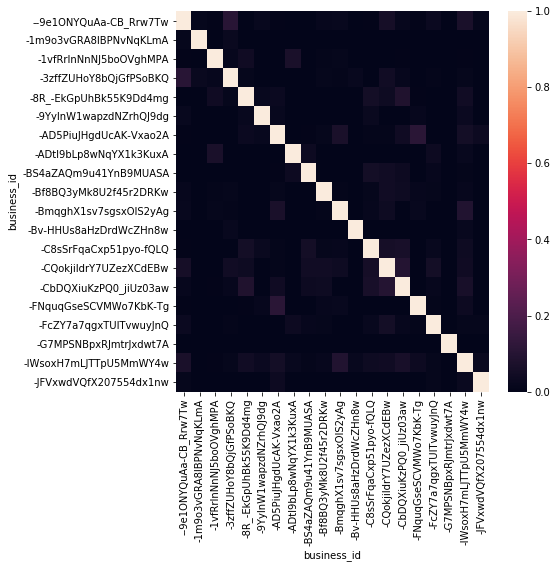

In [44]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [45]:
# Create a placeholder items for closes neighbours to an item
data_neighbours = pd.DataFrame(index=df_items.columns,columns=range(1,11))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(df_items.columns)):
    data_neighbours.ix[i,:10] = df_items.ix[0:,i].order(ascending=False)[:10].index

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: order is deprecated, use sort_values(...)
  


In [61]:
data_neighbours.head(6).ix[:6,2:4]

,2,3,4
business_id,,,
--9e1ONYQuAa-CB_Rrw7Tw,7fxebHYUwIF6CakxSr70iQ,rcaPajgKOJC2vo_l3xa42A,J4CATH00YZrq8Bne2S4_cw
-1m9o3vGRA8IBPNvNqKLmA,fP-26GHwqVt07cgAAaC2IQ,YH9louUrRpucqk8tuHQeCQ,q4i-GbjeSp6ucBDXGE9DqA
-1vfRrlnNnNJ5boOVghMPA,ZyHdmeEnucnlMlK2Yk8fUQ,eBtEx6IQsQDoIDJXTDKdXA,DiCfRiL3WX-vwkK85qrIjw
-3zffZUHoY8bQjGfPSoBKQ,XnJeadLrlj9AZB8qSdIR2Q,LV-oONzEA22qiBEFK1sckA,vLkKorA1gPS97Zj0_WKA0Q
-8R_-EkGpUhBk55K9Dd4mg,h_NnD6TPuhIFy2ZdqOlUgQ,cxnbk6t6L3jnfT5n2Hbl3Q,Y9kXVlU4xPfSZvkZH6C_2Q
-9YyInW1wapzdNZrhQJ9dg,dupc1Q5bl1gwTheS1ZqEig,VNr74A2-5_oqPN7bObPHuw,005XmZKuJZuNbl5tGXc5SA


In [56]:
df[df['business_id'] == '-1vfRrlnNnNJ5boOVghMPA']['name'].unique()

array(['Red Ginseng Narita Sushi & BBQ'], dtype=object)

In [62]:
df[df['business_id'] == 'eBtEx6IQsQDoIDJXTDKdXA']['name'].unique()

array(["Arby's Roast Beef Sandwich Restaurants"], dtype=object)

In [63]:
df_users.head()

user_id,---1lKK3aKOuomHnwAkAow,--RlSfc-QmcHFGHyX6aVjA,--WLHsm-AC4jcol2gOkmCQ,--ZNfWKj1VyVElRx6-g1fg,-05XqtNjcBq19vh2CVJN8g,-0HhZbPBlB1YZx3BhAfaEA,-0MXmdIs75oSWmp8XlQKIw,-1ksPJf0Eppmxj9ZNCkMRw,-21ooEUDqBkCF0hr94Pvgg,-267Yx8RmdP6io2-qI4UcQ,-2UOdDlzg7XLuUuyOrldhA,-2gOxVWcnBr5DclrrsWXCA,-3s52C4zL_DHRK0ULG6qtg,-4JDJeFS0YAYSiSvIshGLQ,-50XWnmQGqBgEI-9ANvLlg,-594af_E7Z9VVjQc9pJK3g,-5McD_r7-sbeZeuIAvnOJg,-5ye1ya0wRQhNRF9NfQ1fA,-6sK3CL1g1OP1FMawX2hxA,-7IMRsmV-Gt7KAK3yivZGQ,-7bM_DeL2Kj2CuYuVDsLNg,-8BrIcsVPbGhv6EAEqbBfA,-8EnCioUmDygAbsYZmTeRQ,-8FDlhUsu5_lVONV_aOnGA,-8MEYFYRHzGEgqBsDV6m2A,-8bfKCvDClxD3iKX9o7J5w,-8eWVKFS0XaktfEaSxMWSw,-8syaSLDbMXW2F2FApVgig,-95gDpECFDSjWEL1AIrkAA,-9B3OS9cH8jIwIjYdqn8xQ,-9I98YbNQnLdAmcYfb324Q,-9da1xk7zgnnfO1uTVYGkA,-9tvXZauwIIpyy9J-moV6A,-AGXyI_K8StzQ7CGehQ2tQ,-AXCpsIGp5Wq1e6wVX4YlA,-Ak9LVDH8GYyWtIMnNo5Ug,-ApvB2uyNYkLCvSfwgLF7g,-B731Wh1510uXX9eC1orQQ,-BevLRnJhh9JeIT2g5I3mQ,-C-l8EHSLXtZZVfUAUhsPA,-C9TzyciiJwct30Mwm_o9Q,-CXdtsZGsM2FBvju5eTAlA,-Cr_udl8Bf-35w5E_5NoHA,-CxzWyvRj3b3tvFdelf38w,-DlNrkkd5iUXwdfmSGx5ew,-E4Smvof6DdBHCnZNyxNMw,-EJorVxe7h2GSxdiRyMmDA,-ELBgtqnuDHoARN3g1n8hQ,-FFqZupwGHf-vrsUHMr_vw,-FjLaUdIRV3I0Pv8i-ICfQ,-Fy91nyOFqPv9M_MaZ4W2g,-HAHTQeOzHX5TCDb7qs9Yw,-HLWgeG3dM_SlcS-vvjEqA,-HcirMcpUDd3GvexCOCCzg,-HdbkVr80PlnsNSLbgW-7g,-IM1qwYck6nqKizjCzR_ww,-Ia1lWvBNdgGySyB2VSgNQ,-IcuwptriARnTWf_EaqgrA,-JvZ2KzL8VCkQI1ZHVrCow,-K3I3SCFvPS_Aw8B4gBtVQ,-KeEr7ZLjbOskY6GGE54hQ,-LEJFq5RC0rQAG831uYRKg,-LUmRqjZdJGLB45pDaqdWA,-Lcp9BDlDDo7j3aIGJWjYg,-LhU9PZZKaP_xFa_rjo9jQ,-Lq86w0tSzzm-SPG8UORsA,-M9PGXdiElWSm4Edm0lEqg,-MqEeaw31xIn1U8mSPWG-Q,-N0xFiL7wxv07F11bfLOvQ,-NHgxN7b9H4g9IIDA1XTVg,-NIopdD4X-FX7V0ucTg2Vg,-NbeVN5tnwdyYAvdNkKMjw,-Ng6kNjzZee-hT-RZYg_Eg,-Ox7QPz0G56GOzT0ex-f5Q,-PAOMIe7lqq1x5GB1pcKMg,-PHC1ulwHkY4LEmMqmFwPg,-PP2PBPpbrYdITLHJzNb4A,-PUQqO7rbjmdQ0KwYcbGAg,-PXJEs_9T0lRKpssxf3otg,-PbPi3wYwpLHs6bM7pwFrA,-PfcLYFMW9ZXc1DEWSqw-g,-Q4HGzcXSCeiqvmY2mg-aQ,-Q4e76IjAqixOEKXkWYxlQ,-Q4lgMSfhoSiVj62dvzUPw,-QViqz6QGfMLUYLY73lysg,-QX-SOFGJHCeSH2CMxr0BQ,-QeO_KlWX19xZUmuv0eXjw,-QmmHtp57b3zT79APvRONA,-R-Z97qJK3E1S8lQSda8Gg,-RA9NLalwmRTOX_8UMHnVQ,-RApyq06DMBii7ovXtQnfw,-R_hd3xKlnUIi_m-IZsY9Q,-Rdc_Yz1WL16lBv7S3PUMg,-SISdpV3Q202NW50EISxWQ,-SWRw9-1ARVKLAWE0Sxw1Q,-SjQXQd-IRfOdUdYYwWGOQ,-TMDrC66dvClx5Z7Hdzrfw,-Tj4e-zW67MXj9Z7-Zkzpw,-U81P8KvkEbl0-aJBGwetQ,-URAJU5BQAM2F1_SNna81g,-UtSFRnsdUgC_R1OzGZVhA,-VNv58eLhbQpz787rcD8VA,-VOylYXNq7sG6As966yTxA,-Vrb0dmE3AxJuJ0dyVY4NA,-WCWlsVGhxaLQMfpKuuKhw,-WYbVngIGDQ81MY12UtwnA,-Wd_SCRLmBeRH8c-TmJ55A,-X8saOIinN36j-Z5_s767Q,-XN6b7pqV2lghQgrIgu3vQ,-XPUcrd6F2wHVUITFAlOYA,-XouWRfq24qMx37oJcXXmg,-XvB5TvlGahyamqIsJO-fg,-YLiMJ0xeWxqny9O9YKzoA,-YV1yESQXqR3vpIgBjKDsw,-Z0uXJn_uP3U0h-e31sTKw,-ZCGdGLtETgNEaOtqHQmSQ,-ZEKvTTWmSCdRJam9YfB1Q,-ZQknHztP6Kpf2DKtCF51w,-_lw9mjGf-92eC90JPW2_w,-aV7azrzW2rlAm6G4DA-cw,-b4O2A-ntjSla1bPnfxU1Q,-bg2NzPGRxVbyftAzaTLiQ,-bh9TmtLO6w7-o07Zr7GiA,-bj4evSejxRDuvYnmcGNrg,-brNcfzn5EaIYORDy4Xj8g,-bt7uzN1JCGauBR64cNupg,-c9G-JHNqrPY0_UU9j7BJA,-d1-LUHXVOw2t3bdJHg26Q,-dD3Oo1tDZYUSecu8Gxq9Q,-dDBNkNgZYyHagrYW60wxg,-dxDfwn30JSChQmO1Bmpeg,-e372MSRHw6vvxliWcxBOA,-eVBjD2-3MJzIyJwwtcGsg,-edOrcdWGnNLodyAEadUKA,-f--l4tZ2F7S0SmoO6wyaA,-fUARDNuXAfrOn4WLSZLgA,-fVKgpmSu0tDnf_xBPqU4A,-fzk0slIjoFQD1eWjx1uWw,-fzqv_NhAkmh4Wu0F9qxDw,-gN7r8iOBKGeh4LJkn2QeQ,-gQZ1BfxbXEN8XuoYBJd2g,-gQm-IoK2_BMEMx9OgtQnw,-gSz76_bKNJsKM2adr12yw,-gTz-C55z7gObvo-R5zzZg,-gc1y2tmDyOJXnMbV_wKpA,-gfC7auUsRN2KqTBzHMBZg,-gi3QTLxpER5LqqPXYEsMw,-go-R_jzvYLYngQbfKN4_A,-guyVbrMJxVeBcfdRQc6xw,-gzqF2ucnXwHf64_k2Hoxg,-h3OxE2YbWzFXVkBhYtJTw,-hFSXulXh22Es29Y4F4cgQ,-hYYjAXSAa657rY0ANtTGQ,-hxUwfo3cMnLTv-CAaP69A,-iBUZFbX7m2IrnraAhhQHg,-j-8EX-ebLXybLAdDQOGzw,-j3PQicmtfQz6RyaK0S1-w,-jL7hLAAwOnCAWKQlL9Wew,-jpu5KX95HLWJdztLq53uQ,-k5yFUChotBMGQgHdFZvLQ,-kO6984fXByyZm3_6z2JYg,-kRQLEDxrEBVNXImyAt_ug,-khrbWmeaZDZ6hzTgJ4HpQ,-ki-qIZHP4zZ2D49-b8ZzA,-lCMo6oeRPQVOBu-27qsQQ,-lLEwwXKARlLhAd05tfmVA,-lORwg9gjWI6q3-2-J7dLw,-lWYDxgOF99Hpxc0hrAuFQ,-lh59ko3dxChBSZ9U7LfUw,-mGJPKC0owz3HTrrZfgFUg,-mXobpJ3z3X6nMriCklbog,-mzS8ZrsN5vIhAM22gcS3Q,-ne-7caCLAk2j3kD7tzBGw,-nuKSqlNyZv7A

In [64]:
df_users[0:10][df_users.columns[0:10]]

user_id,---1lKK3aKOuomHnwAkAow,--RlSfc-QmcHFGHyX6aVjA,--WLHsm-AC4jcol2gOkmCQ,--ZNfWKj1VyVElRx6-g1fg,-05XqtNjcBq19vh2CVJN8g,-0HhZbPBlB1YZx3BhAfaEA,-0MXmdIs75oSWmp8XlQKIw,-1ksPJf0Eppmxj9ZNCkMRw,-21ooEUDqBkCF0hr94Pvgg,-267Yx8RmdP6io2-qI4UcQ
user_id,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,1.000000,0.000000,0.000000,0.000000,0.000000,0.057295,0.091958,0.058649,0.000000,0.073589
--RlSfc-QmcHFGHyX6aVjA,0.000000,1.000000,0.000000,0.082318,0.000000,0.046397,0.000000,0.000000,0.051188,0.052143
--WLHsm-AC4jcol2gOkmCQ,0.000000,0.000000,1.000000,0.038680,0.000000,0.000000,0.029159,0.000000,0.144315,0.000000
--ZNfWKj1VyVElRx6-g1fg,0.000000,0.082318,0.038680,1.000000,0.000000,0.000000,0.000000,0.012560,0.152286,0.030779
-05XqtNjcBq19vh2CVJN8g,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.074954,0.000000,0.018548,0.033740
-0HhZbPBlB1YZx3BhAfaEA,0.057295,0.046397,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.009993
-0MXmdIs75oSWmp8XlQKIw,0.091958,0.000000,0.029159,0.000000,0.074954,0.000000,1.000000,0.000000,0.000000,0.000000
-1ksPJf0Eppmxj9ZNCkMRw,0.058649,0.000000,0.000000,0.012560,0.000000,0.000000,0.000000,1.000000,0.000000,0.020457
-21ooEUDqBkCF0hr94Pvgg,0.000000,0.051188,0.144315,0.152286,0.018548,0.000000,0.000000,0.000000,1.000000,0.082683


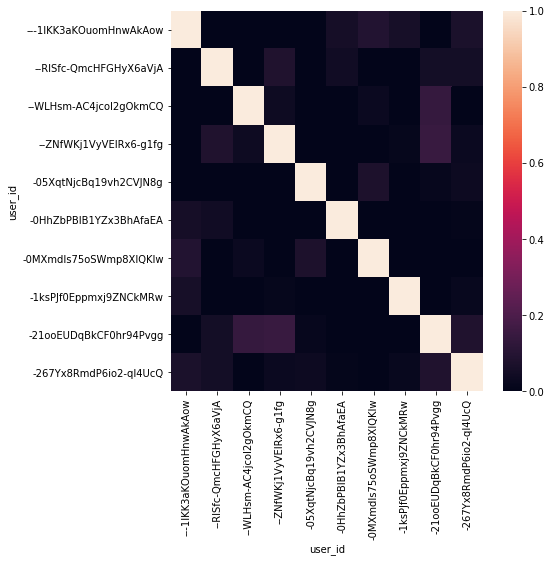

In [65]:
import seaborn as sns
corr = df_users[0:10][df_users.columns[0:10]]
plt.figure(figsize=(7,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [55]:
users=df1['user_id'].values


In [58]:
df_user_recs=df_users.apply(lambda row : users[np.argsort(row)[::-1]],axis=1)

In [59]:
df_nearest_neighbors_all=df_user_recs[df_user_recs.columns[0:]]

In [60]:
df_nearest_neighbors_5 = df_nearest_neighbors_all[df_nearest_neighbors_all.columns[0:5]]


In [61]:
df_nearest_neighbors_5.head()


user_id,---1lKK3aKOuomHnwAkAow,--RlSfc-QmcHFGHyX6aVjA,--WLHsm-AC4jcol2gOkmCQ,--ZNfWKj1VyVElRx6-g1fg,-05XqtNjcBq19vh2CVJN8g
user_id,,,,,
---1lKK3aKOuomHnwAkAow,---1lKK3aKOuomHnwAkAow,4Zqh0-Db39qpGEHCIll9hw,ZfKr-r9PXwROFlefzw_zzg,Ii1PkdRpONUNwKC3lmhl1A,Urq54Q9SWt1w0PiHMGb4Iw
--RlSfc-QmcHFGHyX6aVjA,--RlSfc-QmcHFGHyX6aVjA,mHp4g3_z2dmD9UPXzuE8bQ,tH0uKD-vNwMoEc3Xk3Cbdg,ZyGrNTbnab8N3kmesYaQBQ,zHzvPBcXuzyGSAPzc0k2Bg
--WLHsm-AC4jcol2gOkmCQ,--WLHsm-AC4jcol2gOkmCQ,TMr715sCsKg-22WcMnjUlQ,E_1rVCWq4NgbXhEjMC651Q,yOADvvEUHheLZs1BSoxTDw,yX1_CDzyqbNspGApWWKuxQ
--ZNfWKj1VyVElRx6-g1fg,--ZNfWKj1VyVElRx6-g1fg,11k3A-_Ifz_86LHvkGRgoQ,J9HamWsxKorlPGUAXy-M9Q,8HyODWHxD1Vmq5O7HeJe-A,pnfVIB7UhvCQ7X2K0Q2XIw
-05XqtNjcBq19vh2CVJN8g,-05XqtNjcBq19vh2CVJN8g,IqWNLmid5wNci-g06btQOg,qGSUC1LJLOrR4iN4BauTSg,XtHLD11D1qvqPmUTDGclhA,TLLpIA8b69CvkXMulbz5mQ


In [62]:
df1.head()


business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1vfRrlnNnNJ5boOVghMPA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-BS4aZAQm9u41YnB9MUASA,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-C8sSrFqaCxp51pyo-fQLQ,-CbDQXiuKzPQ0_jiUz03aw,-FNquqGseSCVMWo7KbK-Tg,-FcZY7a7qgxTUlTvwuyJnQ,-IWsoxH7mLJTTpU5MmWY4w,-JFVxwdVQfX207554dx1nw,-JfncbVURtvuzBbof40o1w,-K82LBrI3H0FVuhTbNDpRA,-Le6cwbZL4tDZwNHwipfKg,-LzUYsR54hd8cCiYXTquRA,-OEIW0dO96-492qa_luxaw,-P8dGzSVhJi-5oZ-8U2y0w,-PGsEXB6DFTVKa1eDOlzWA,-QNQ4R1VgRoL4b6lC8Anrg,-Qkx7W0itbAApcG5lJuMFQ,-RJ216TTIghZshCkUlD1WQ,-U7tvCtaraTQ9b0zBhpBMA,-WLrZPzjKfrftLWaCi1QZQ,-YWr1wm_NaAlgEf9TZzsMQ,-Ylpy3VyRWwubf9dysuwjQ,-_TSaVr53qiEGqMkwyEMaQ,-_yEVC3_3M6YOsamYfNFEw,-a857YYdjzgOdOjFFRsRXQ,-ed0Yc9on37RoIoG2ZgxBA,-iFvYhgysvjkxckCr42NRw,-ilCufjKjeswCLyIrCtuqQ,-mN7z9oY01Mh_-dwTyzpqg,-oUM2uISux96lMGeawHIOA,-sN_og_84rLW22CaE3cjVw,-wCtRhzWJ40Z4F8mmg7kWg,-wDNRL4lm1UgeFLG9KcrjQ,-xbQQR_ydEJGqYzHSF4DnQ,01Ov9eDxKRY5k6ImMdiWLQ,01SiPgdiOskMC5bUJoyy_g,01VPJkcU0m8WzlA7dCEpVQ,02pL_Xj3sTO_lHcWqUcwKA,03icrim6SfEQJlejDMbzsA,065c76tt1dXBNmoGBymUgQ,06MlxbtB4ZYeg_ri02RIAQ,07AZL5XenCQ_-op_onKLdw,07gh-AImcEcWQ2bew-jprg,07jQarxKd_8J_AJHD5YBqQ,0AQnRQw34IQW9-1gJkYnMA,0CB7YB1qRSWLQvMbHw3Fmw,0EgYXYjt2XJL4hlsKnzrcw,0FHfkDxKSeDuyAEeaY6X-Q,0G1y7uV7w1D2uziS4Lt_Dw,0Hcks5q-DgJbDlmEWolx4A,0InA3Ffj8MxyQV9hgsyYcQ,0LGnU7V3nepi8NUNzyQOXw,0NmTwqYEQiKErDv4a55obg,0OdZXIKQypu6vplpxFilsA,0QHMAUi6NdOUZ1ckXq0-sA,0QSnurP5Ibor2zepJmEIlw,0S4WFZJZhVeM3aAqKjLz1w,0VjHFdczi6Nln_nn8bucJQ,0WPXDs4ini3D7jpiy1Daqw,0WoQQlMXVIDEgI0xNdENKA,0XEqyl_lVaJNHRKxNcjJZg,0YG_kM5caZhtwd6nbnei6A,0_VT3sTwi7gorIlU36ASmg,0_aeYE2-VbsZts_UpILgDw,0_mJttUgHIzC-NO18gcgBA,0ahghcpWQVkm4lEFwx-peA,0aw3HbxkZ4G7pkPYt10fhA,0bWLkWeIcT-EnrE7SiGEBA,0c6PQILCLwRZ8FIB4AEsGw,0d0i0FaJq1GIeW1rS2D-5w,0dr1FgqQSEMbaTu9SDqiIg,0eJG77JOkyMIBhc4Xbuqfw,0eZHVYDyACtVVOIgoBlV3g,0gTTGuA6uEmMhLhfJi0hqA,0gWg-kqRLEQbhui8b_v2Xw,0i9S0BejjRv0ZDwdO9XymA,0jtRI7hVMpQHpUVtUy4ITw,0keht9nVTliinChbGWWkkg,0nlocywsFHQmEt8_xbHNiw,0p27EjcNwTI7Ey4K_MNPww,0qPNeqLuKE88rKbIbSZDpg,0q_BHpxbikVtPRRLRu-U0g,0qet57CmMA5qUm6gPFUTpg,0uR48n5SYcLE_DLcjONZPg,0ueq5zB3NqLbh93KYYNIHQ,0w3BdEOxvwKTpypwbN5kiQ,0wW9PasC8pw8SY7rlY3ZKw,0xdpv5CPpbUUch7JKBG98Q,0xtBEP5zCu1153SoqqemLw,0xvdC8F0HmFpAFkJk6nXLg,0xzmIBsJQc5eUNLucFrZ0Q,0yjLZZx708uJbierAonqQg,0zoXYHq82haayMaV952jEQ,16Fplxu-OwVmTEFxQAUP4g,16tWXenJ1wTqugXJU7yiZg,19S0gFtg5GTX6CkiApJiAQ,19umlhmVB9O3njIBfRAe8g,1CP8aJa8ILlfM5deroar0Q,1CR2ddUcjYYwRd5JLtiRrw,1CTapYK3FHvpiJaQhOaaIw,1CWMNSTRMejdSyXBG2chNg,1DP5vHxJzCDbgawv0WC3yA,1Df5WnLX3DqN6ymlhqznaQ,1FAvxOUOGGyZoYNlAXACag,1JgaRBX0oiRsvEhHF3ZMjw,1KhBzrqmU164bss64jR5uA,1M1A-s6BbnzK3eURw01rZQ,1ME-zOtZ9HApzJUOpR0-vQ,1MrSwj8i2VEBHdp3IsWCpQ,1SCETxRnwaYo2aBC3fi4SA,1SE9f6TEV5XhnTuuK01xwA,1SqLPgnZEVeVYDM-AuoFhg,1Tak6Q-IlkDrdmLwrEZeSg,1UdRVfBlE3unETOu7BDCvw,1UvrUFk3BXAmueL1KQaKPQ,1V-mRUpVnIRq6GYymT_uyw,1VTezD8PLosh-FeNxSRQ7g,1Vvxx-9AoINg8TJXOZgEHg,1WBVqmo7tgF0z0eGf4fPhQ,1XeI5PX5RxvFlaAHBKRUYA,1Z5S_Lkcl6vA3ZvrAG91TA,1ZJz840L496LAmQdeDv0WA,1ZnVfS-qP19upP_fwOhZsA,1aj4TG0eFq6NaPBKk6bK7Q,1bALsE6aZE23mGV2WPxN_g,1diuAK7FMn93WxlK-ndJhA,1g29d62cEojB-7mX7p8AzQ,1jpYP-JNOEYCMIzP4OlGuQ,1qTx9z8RMz7RIYKAfnpZ0A,217u7Wad7y90x4el26-TIw,21sGRVR7HEs_t6PdB9tGMw,25PEf9-e8_7phdV7JjOHhA,25wTaO0_Rk-GLb4k2uMs0Q,296PZdxSrtH08EUwCsOKMw,2B46bRpDh49eDyjXGhL_ZQ,2DydwQRkIutHarWT_o1L0Q,2HxaDXZmAOH6LiuzGgNdPA,2I_qSTehoUFsDNjaqCVxlA,2IvrdAb6zdxr3ZqplqJHbg,2LL-pWxdM_rvnaIpNxezsQ,2LNnIARy-lGmrlEMZSxZ1w,2Mp53KxlGeZJkodTuqpVow,2PS9kBbuJcmBhcNp-D62uA,2RFe9vDTzyBkF4mvsFDDow,2SfSzEd3B7WimeZac23zhg,2Wl4o7l54I-EtxtaDpOTzA,2XkVexeY_8zyc9nriSElQg,2Y0-nrSZNsLRStyupZgM7g,2YBO1LEKIgyle0uX50u15Q,2bK1ng2mnRdtTh_BDNGmIg,2dCnTMv3Hh-fM8bOjYS4Xw,2g_auUWw7c3c2CUTgVqI8Q,2hSIeCX2cV-chFcBBXrZZA,2hyciWHsqnbqdEkUvO3KuQ,2iTsRqUsPGRH1li1WVRvKQ,2lPLbTenaBH3SGHgpwM54A,2m4092MsMzEHkuxodaj6-g,2rvBPUBtQU0WfcOAHLQWRQ,2sdU3Fq3Wv2XQycJoJQArg,2sx52lDoiEtef7xgPCaoBw,2weQS-RnoOBhb1KsHKyoSQ,310Eyru1zsZ9K7BA-bgPQw,31cOttU_tML5b6eLLXZfsQ,32JWhoH-Kiu1wRFTvHvW9Q,33Tr0eRki1Yamzleu4GMdw,34PMhyoSQ

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-1vfRrlnNnNJ5boOVghMPA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-BS4aZAQm9u41YnB9MUASA,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-Bv-HHUs8aHzDrdWcZHn8w,-C8sSrFqaCxp51pyo-fQLQ,-CQokjildrY7UZezXCdEBw,-CbDQXiuKzPQ0_jiUz03aw,-FNquqGseSCVMWo7KbK-Tg,-FcZY7a7qgxTUlTvwuyJnQ,-G7MPSNBpxRJmtrJxdwt7A,-IWsoxH7mLJTTpU5MmWY4w,-JFVxwdVQfX207554dx1nw,-JfncbVURtvuzBbof40o1w,-K82LBrI3H0FVuhTbNDpRA,-LMycE26AortJDsbc8oXOg,-Le6cwbZL4tDZwNHwipfKg,-LzUYsR54hd8cCiYXTquRA,-N_agk8RUHvHk3GVDsyunQ,-NjZ5HZApXjRJaTVZeSO_w,-OEIW0dO96-492qa_luxaw,-P8dGzSVhJi-5oZ-8U2y0w,-PGsEXB6DFTVKa1eDOlzWA,-PbM4ksxhGZVpgCpRakcgA,-QNQ4R1VgRoL4b6lC8Anrg,-Qkx7W0itbAApcG5lJuMFQ,-RJ216TTIghZshCkUlD1WQ,-U7tvCtaraTQ9b0zBhpBMA,-Uix-n4Jqo4W7ERagC5qAA,-WLrZPzjKfrftLWaCi1QZQ,-YCd2_DdJUeZx3RRcmIZ_g,-YWr1wm_NaAlgEf9TZzsMQ,-Ylpy3VyRWwubf9dysuwjQ,-_TSaVr53qiEGqMkwyEMaQ,-_yEVC3_3M6YOsamYfNFEw,-a857YYdjzgOdOjFFRsRXQ,-cxD1NimFldATDUsN-oa3A,-dGORHtjPRnQzTZ2-SYa_g,-ed0Yc9on37RoIoG2ZgxBA,-hzQQ8tbXThpp0k5E_y1Dw,-iFvYhgysvjkxckCr42NRw,-ilCufjKjeswCLyIrCtuqQ,-kbPPBNsIPDfMfgUGO7QhA,-mN7z9oY01Mh_-dwTyzpqg,-n8PaipyFGNUJE4xlnrOAg,-oUM2uISux96lMGeawHIOA,-pGO9M4JLQJHiaCOrqCgbQ,-sN_og_84rLW22CaE3cjVw,-tseCGdDvepLP8IIWtZikQ,-uRn5Hf1uo4vf3UTtOvIfA,-wCtRhzWJ40Z4F8mmg7kWg,-wDNRL4lm1UgeFLG9KcrjQ,-xbQQR_ydEJGqYzHSF4DnQ,005XmZKuJZuNbl5tGXc5SA,01Ov9eDxKRY5k6ImMdiWLQ,01SiPgdiOskMC5bUJoyy_g,01VPJkcU0m8WzlA7dCEpVQ,02pL_Xj3sTO_lHcWqUcwKA,03Yt7kMeYihN_y6ptiXxyQ,03hgFWEcDg205hOCnswwiQ,03icrim6SfEQJlejDMbzsA,065c76tt1dXBNmoGBymUgQ,06MlxbtB4ZYeg_ri02RIAQ,07AZL5XenCQ_-op_onKLdw,07gh-AImcEcWQ2bew-jprg,07jQarxKd_8J_AJHD5YBqQ,0AQnRQw34IQW9-1gJkYnMA,0AZCpDQpbi83NHh9uEpggQ,0CB7YB1qRSWLQvMbHw3Fmw,0EgYXYjt2XJL4hlsKnzrcw,0EpnzIpeFvhISkxMTIv9WA,0FHfkDxKSeDuyAEeaY6X-Q,0G1y7uV7w1D2uziS4Lt_Dw,0G83H_zoum-Q4bWU2olTqQ,0HG02r8ri7GEFwuwmdHCyg,0Hcks5q-DgJbDlmEWolx4A,0If0W5y2M__8j0Xjlwuk0g,0IjBFHFm8M-VPyym-Xrkhw,0InA3Ffj8MxyQV9hgsyYcQ,0LGnU7V3nepi8NUNzyQOXw,0M7rIhQLKD-j2XSnKgt2ng,0Nb4piKDUVbedlrakwEUuw,0NmTwqYEQiKErDv4a55obg,0OdZXIKQypu6vplpxFilsA,0QHMAUi6NdOUZ1ckXq0-sA,0QSnurP5Ibor2zepJmEIlw,0S2fiheNzQLDSCs89Kmgnw,0S4WFZJZhVeM3aAqKjLz1w,0TljdWRIDQzlp4siHQ_BAQ,0VjHFdczi6Nln_nn8bucJQ,0WPXDs4ini3D7jpiy1Daqw,0WoQQlMXVIDEgI0xNdENKA,0XEqyl_lVaJNHRKxNcjJZg,0YG_kM5caZhtwd6nbnei6A,0YctfylXsdutJo8qFYnZJA,0_VT3sTwi7gorIlU36ASmg,0_aeYE2-VbsZts_UpILgDw,0_mJttUgHIzC-NO18gcgBA,0ahghcpWQVkm4lEFwx-peA,0aw3HbxkZ4G7pkPYt10fhA,0bWLkWeIcT-EnrE7SiGEBA,0c6PQILCLwRZ8FIB4AEsGw,0d0i0FaJq1GIeW1rS2D-5w,0dr1FgqQSEMbaTu9SDqiIg,0eJG77JOkyMIBhc4Xbuqfw,0eZHVYDyACtVVOIgoBlV3g,0gTTGuA6uEmMhLhfJi0hqA,0gWg-kqRLEQbhui8b_v2Xw,0i9S0BejjRv0ZDwdO9XymA,0jtRI7hVMpQHpUVtUy4ITw,0keht9nVTliinChbGWWkkg,0lxyY2bwmpde2QHcnh8fZQ,0mnnlFCploePlnEaddw63g,0nlocywsFHQmEt8_xbHNiw,0odAupWjDV8gwhaLqyh1-A,0p27EjcNwTI7Ey4K_MNPww,0qPNeqLuKE88rKbIbSZDpg,0q_BHpxbikVtPRRLRu-U0g,0qet57CmMA5qUm6gPFUTpg,0rk2_lmbfpiYXGBFmyxx9Q,0tnZj3GkhKxPd9hT3HXt5A,0uR48n5SYcLE_DLcjONZPg,0ueq5zB3NqLbh93KYYNIHQ,0uzQymPVW2l24rpjX9KIBA,0w3BdEOxvwKTpypwbN5kiQ,0wW9PasC8pw8SY7rlY3ZKw,0xdpv5CPpbUUch7JKBG98Q,0xtBEP5zCu1153SoqqemLw,0xvdC8F0HmFpAFkJk6nXLg,0xzmIBsJQc5eUNLucFrZ0Q,0ydy2fdDg6kpGy1dbnHYsQ,0yjLZZx708uJbierAonqQg,0zb1wdN4YN_ti87B_JIseg,0zoXYHq82haayMaV952jEQ,1-Jdq5Up9SgKoqptGvkXHA,12P7GjIoq6oj7qCyJ_c0Ag,12f7GOkkC0GZRMif-fidhQ,16Fplxu-OwVmTEFxQAUP4g,16NS8EICI94IGdn-S0yxkw,16tWXenJ1wTqugXJU7yiZg,19S0gFtg5GTX6CkiApJiAQ,19lr9xcN3Ud0w0UX7bl6Qw,19umlhmVB9O3njIBfRAe8g,19wIOjBlI_2EKGM8E4O6Mg,1BtNZszIr8LvtPOhN0X4Mw,1CP8aJa8ILlfM5deroar0Q,1CR2ddUcjYYwRd5JLtiRrw,1CTapYK3FHvpiJaQhOaaIw,1CWMNSTRMejdSyXBG2chNg,1CaM8eIvl41l4f3V-V-cAw,1DP5vHxJzCDbgawv0WC3yA,1Df5WnLX3DqN6ymlhqznaQ,1FAvxOUOGGyZoYNlAXACag,1Fa_brd85F_-gXYP45GpsA,1JgaRBX0oiRsvEhHF3ZMjw,1KhBzrqmU164bss64jR5uA,1LOr_-vGiVMNod08H9T-1w,1M1A-s6BbnzK3eURw01rZQ,1ME-zOtZ9HApzJUOpR0-vQ,1MrSwj8i2VEBHdp3IsWCpQ,1NZNZHnGE4-FLZmU6xp3oQ,1SCETxRnwaYo2aBC3fi4SA,1SE9f6TEV5XhnTuuK01xwA,1SqLPgnZEVeVYDM-AuoFhg,1Tak6Q-IlkDrdmLwrEZeSg,1UdRVfBlE3unETOu7BDCvw,1UvrUFk3B

In [67]:
X.shape

(10607, 2637)

In [64]:
item_item = 1-pairwise_distances(X[0:8000].T, metric="cosine")
df_items = pd.DataFrame(item_item,columns=X.columns,index=X.columns)

In [70]:
df_items.shape

(2637, 2637)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if sys.path[0] == '':


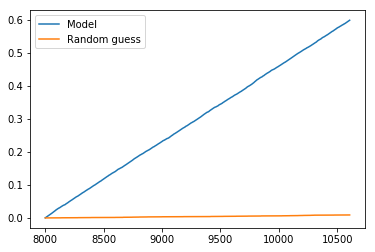

In [76]:
recall=[]
guesses = 3
recall_total = 0
recall_guess = 0

recall_guesses = []

for n in range(8000,X.shape[0]):
    user = np.append(X[n:n+1].values[0][0:2000],np.zeros(X.shape[1]-2000))
    user_prefs = df_items.dot(user/np.sum(user))
    
    user_prefs.sort()
    already_liked=df_items[df_items.columns[np.where(X[n:n+1].values[0]>0)][0:5]].columns.values

    test_data=df_items[df_items.columns[np.where(X[n:n+1].values[0]>0)][5:]].columns.values
    
    user_suggestions =[s for s in user_prefs.index[::-1][0:guesses] if s not in already_liked]
    
    correct = [c for c in user_suggestions if c in test_data]
    gue=random.sample(range(len(user_prefs.index)), min(guesses,len(user_prefs)))
    guess_list = [g for g in user_prefs.index[gue]  if g in test_data]

    recall_total = recall_total + float(len(correct))
    recall_guess = recall_guess + float(len(guess_list))
   
    recall.append(recall_total)
    recall_guesses.append(recall_guess)
plt.plot(range(8000,X.shape[0]),recall/(np.array(guesses)*(X.shape[0]-8000)),label='Model')
plt.plot(range(8000,X.shape[0]),recall_guesses/(np.array(guesses)*(X.shape[0]-8000)),label='Random guess')
plt.legend()

range(8000, 10607)